fft start
fft end


<function matplotlib.pyplot.show(*args, **kw)>

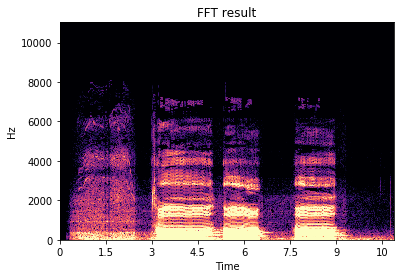

In [4]:
# Original text ling: https://m.blog.naver.com/PostView.nhn?blogId=gaechuni&logNo=221649637954&proxyReferer=https%3A%2F%2Fwww.google.com%2F
# wav 파일을 읽어서 FFT를 수행하는 함수 코드
# 512샘플만큼 오버랩하여 1024 FFT를 수행하는 코드이다.
# fFFT의 결과를 스펙트럼이라 하고, 이 결과를 시간적으로 나열한 것을 스펙트로그램이라 한다.
import scipy.signal as signal
import math
import librosa
import numpy as np

def wav_fft(file_name):
    print("fft start")
    audio_sample, sampling_rate = librosa.load(file_name, sr = None)
    fft_result = librosa.stft(audio_sample, n_fft=1024, hop_length=512, win_length = 1024, window=signal.hann).T
    mag, phase = librosa.magphase(fft_result)
    print("fft end")
    return mag

# dB scale을 신호로 변환시키는 것
# 소리 신호를 0~1 구간으로 normalization 시켜주는 것: nolmalization: 정규화: 데이터 범위를 0과 1로 변환하여 
                                                     # 데이터 분포를 조정하는 절차

    
# normalize_funtion
min_level_db = -100
def _normalize(S):
    return np.clip((S-min_level_db)/(-min_level_db), 0, 1)


mag = wav_fft("test_voice.wav")
mag_db = librosa.amplitude_to_db(mag)
mag_n = _normalize(mag_db)

import matplotlib.pyplot as plt
import librosa.display

# 아래 'time' 이후로 sr=sampling_rate를 이어서 써야 하는데 이 항목이 정의되지 않았다고 한다.
# 삭제 후 실행하면 된다.
librosa.display.specshow(mag_n.T, y_axis='linear', x_axis='time')
plt.title('FFT result')
plt.show

# 아래 그림과 D드라이브\IVH연구소_FFT_학습자료\jupyter_20200303(화)_FFT_USING_AUDIO_SAMPLE_FILE_관련자료의
# 원본 사진을 비교해 보자 원본 사진에는 큰 형태가 3개가 있지만 아래에는 4개가 보인다.
# 원본에서는 진폭을 나타낸 것이고 아래는 주파수를 나타낸 것이다. 소리의 크기에는 진폭이 관여하므로
# 아래그림에서처럼 주파수가 4개가 나타나는 것이 맞다
# 원본을 녹음할 때 초반 도입 부분은 기타 잡음이 녹음된 것 같은데 소리는 작더라고 최대 주파수가
# 6000Hz는 될 것으로 보인다. 끝.
